<h1 align=center> Taller 2</h1>

Integrantes:
- Sebastián Hernández
- Axel Mondaca

In [2]:
import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score




### Importación de archivos

In [3]:
features = pd.read_csv('features.txt', sep=r'\s+', header=None, names=['feature_id','feature_name'])
activity_labels = pd.read_csv('activity_labels.txt', sep=r'\s+', header=None, names=['activity_id', 'activity_name'])

X_train = pd.read_csv('X_train.txt', sep=r'\s+', header=None)
X_test = pd.read_csv('X_test.txt', sep=r'\s+', header=None)
y_train = pd.read_csv('y_train.txt', header=None)
y_test = pd.read_csv('y_test.txt', header=None)

X_train.columns = features['feature_name']
X_test.columns = features['feature_name']

y_test.columns = ['activity_id']
y_train.columns = ['activity_id']
activity_map = dict(zip(activity_labels['activity_id'], activity_labels['activity_name']))

y_train['activity_name'] = y_train['activity_id'].map(activity_map)
y_test['activity_name'] = y_test['activity_id'].map(activity_map)

X_test

feature_name,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


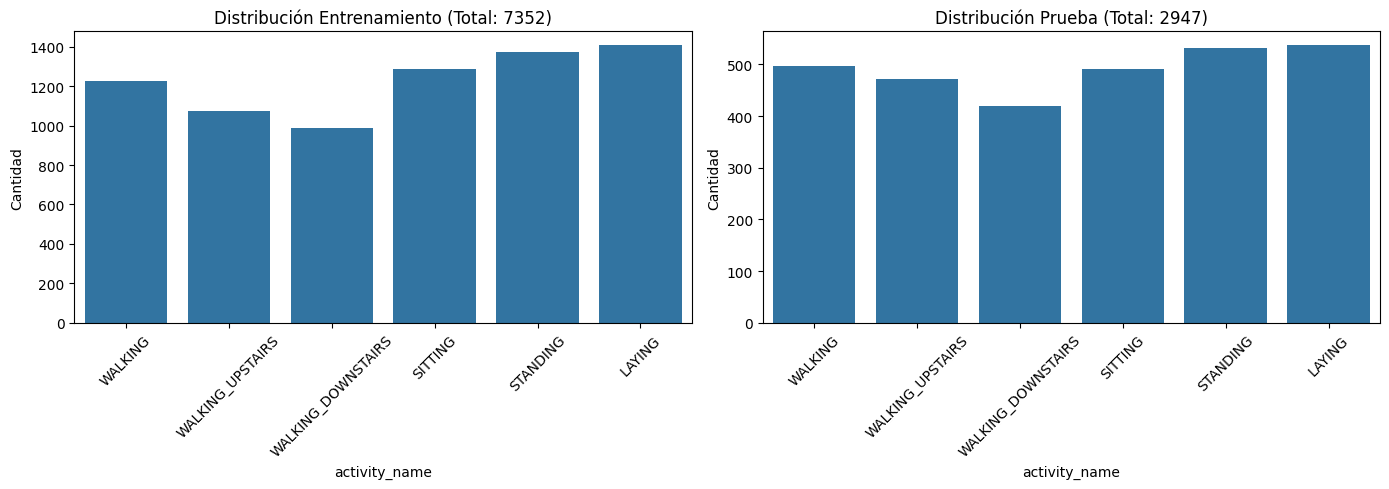

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico Entrenamiento
sns.countplot(x='activity_name', data=y_train, ax=axes[0], order=activity_labels['activity_name'])
axes[0].set_title(f'Distribución Entrenamiento (Total: {len(y_train)})')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Cantidad')

# Gráfico Prueba
sns.countplot(x='activity_name', data=y_test, ax=axes[1], order=activity_labels['activity_name'])
axes[1].set_title(f'Distribución Prueba (Total: {len(y_test)})')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()


In [5]:
print("Datos faltantes en X_train:", X_train.isnull().sum().sum())
print("Datos faltantes en X_test:", X_test.isnull().sum().sum())

print("Mínimos correctos (>=-1):", (X_train.min() >= -1).all())
print("Máximos correctos (<=1):", (X_train.max() <= 1).all())

print("Mínimos correctos (>=-1):", (X_test.min() >= -1).all())
print("Máximos correctos (<=1):", (X_test.max() <= 1).all())


Datos faltantes en X_train: 0
Datos faltantes en X_test: 0
Mínimos correctos (>=-1): True
Máximos correctos (<=1): True
Mínimos correctos (>=-1): True
Máximos correctos (<=1): True


Con esto verificamos que todos los datos se encuentran normalizados

In [6]:
grupos = {
    'Tiempo - Acelerómetro': [c for c in X_train.columns if c.startswith('t') and 'Acc' in c],
    'Tiempo - Giroscopio':   [c for c in X_train.columns if c.startswith('t') and 'Gyro' in c],
    'Frecuencia - Acelerómetro': [c for c in X_train.columns if c.startswith('f') and 'Acc' in c],
    'Frecuencia - Giroscopio':   [c for c in X_train.columns if c.startswith('f') and 'Gyro' in c]
}

stats_data = []

for nombre, cols in grupos.items():
    valores = X_train[cols].values.flatten()
    
    stats_data.append({
        'Grupo': nombre,
        'Media': valores.mean(),
        'Desv. Estándar': valores.std(),
        'Mínimo': valores.min(),
        'Máximo': valores.max()
    })

df_stats = pd.DataFrame(stats_data).set_index('Grupo')


display(df_stats.round(4))

,Media,Desv. Estándar,Mínimo,Máximo
Grupo,,,,
Tiempo - Acelerómetro,-0.2693,0.5734,-1.0,1.0
Tiempo - Giroscopio,-0.2972,0.5444,-1.0,1.0
Frecuencia - Acelerómetro,-0.8049,0.3237,-1.0,1.0
Frecuencia - Giroscopio,-0.8291,0.3155,-1.0,1.0


In [7]:
variances = X_train.var()

constant_features = variances[variances == 0]
print(f"Características constantes (Varianza = 0): {len(constant_features)}")

threshold = 0.005
low_variance_features = variances[variances < threshold]

print(f"Características con varianza menor a {threshold}: {len(low_variance_features)}")

if len(low_variance_features) > 0:
    print("\nTop 10 características con menor varianza (candidatas a eliminar):")
    display(low_variance_features.sort_values())

Características constantes (Varianza = 0): 0
Características con varianza menor a 0.005: 7

Top 10 características con menor varianza (candidatas a eliminar):


feature_name
tBodyAcc-mean()-Y                   0.001665
tBodyAcc-mean()-Z                   0.003208
fBodyAccJerk-bandsEnergy()-57,64    0.003367
fBodyGyro-bandsEnergy()-33,40       0.004192
fBodyGyro-bandsEnergy()-33,40       0.004287
fBodyGyro-bandsEnergy()-33,48       0.004666
tBodyAcc-mean()-X                   0.004937
dtype: float64

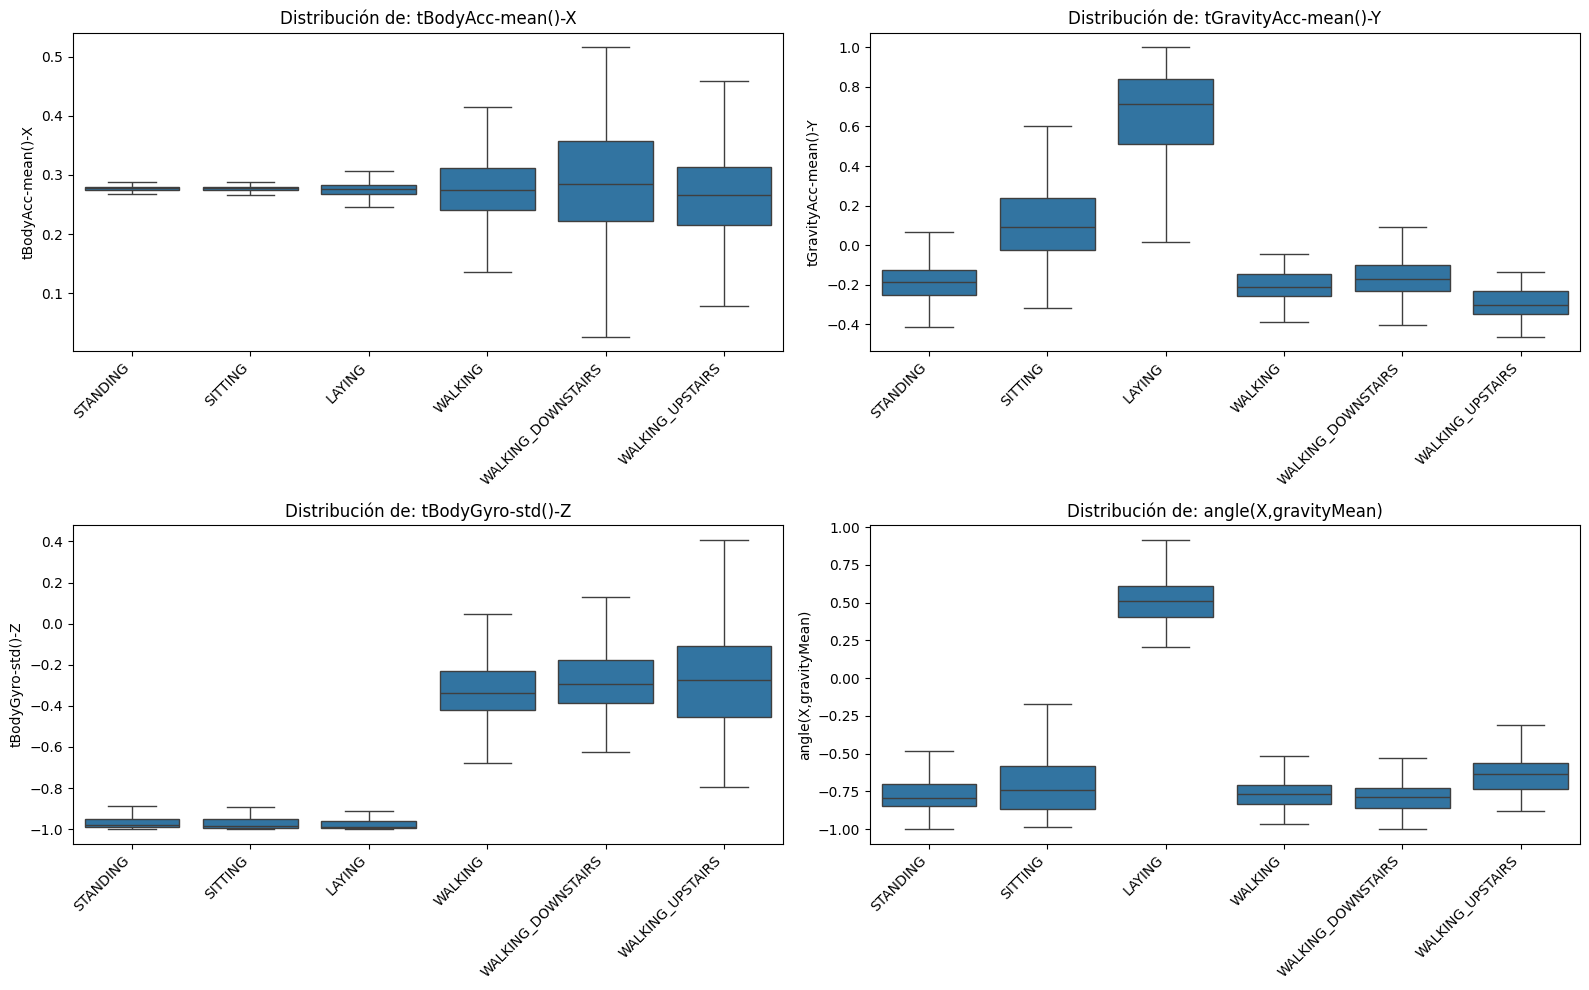

In [8]:
plot_data = X_train.copy()

plot_data['Activity'] = y_train['activity_name']

selected_features = [
    'tBodyAcc-mean()-X',       
    'tGravityAcc-mean()-Y',   
    'tBodyGyro-std()-Z',      
    'angle(X,gravityMean)'   
]

plt.figure(figsize=(16, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Activity', y=feature, data=plot_data, showfliers=False)
    plt.title(f'Distribución de: {feature}', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('')
plt.tight_layout()
plt.show()

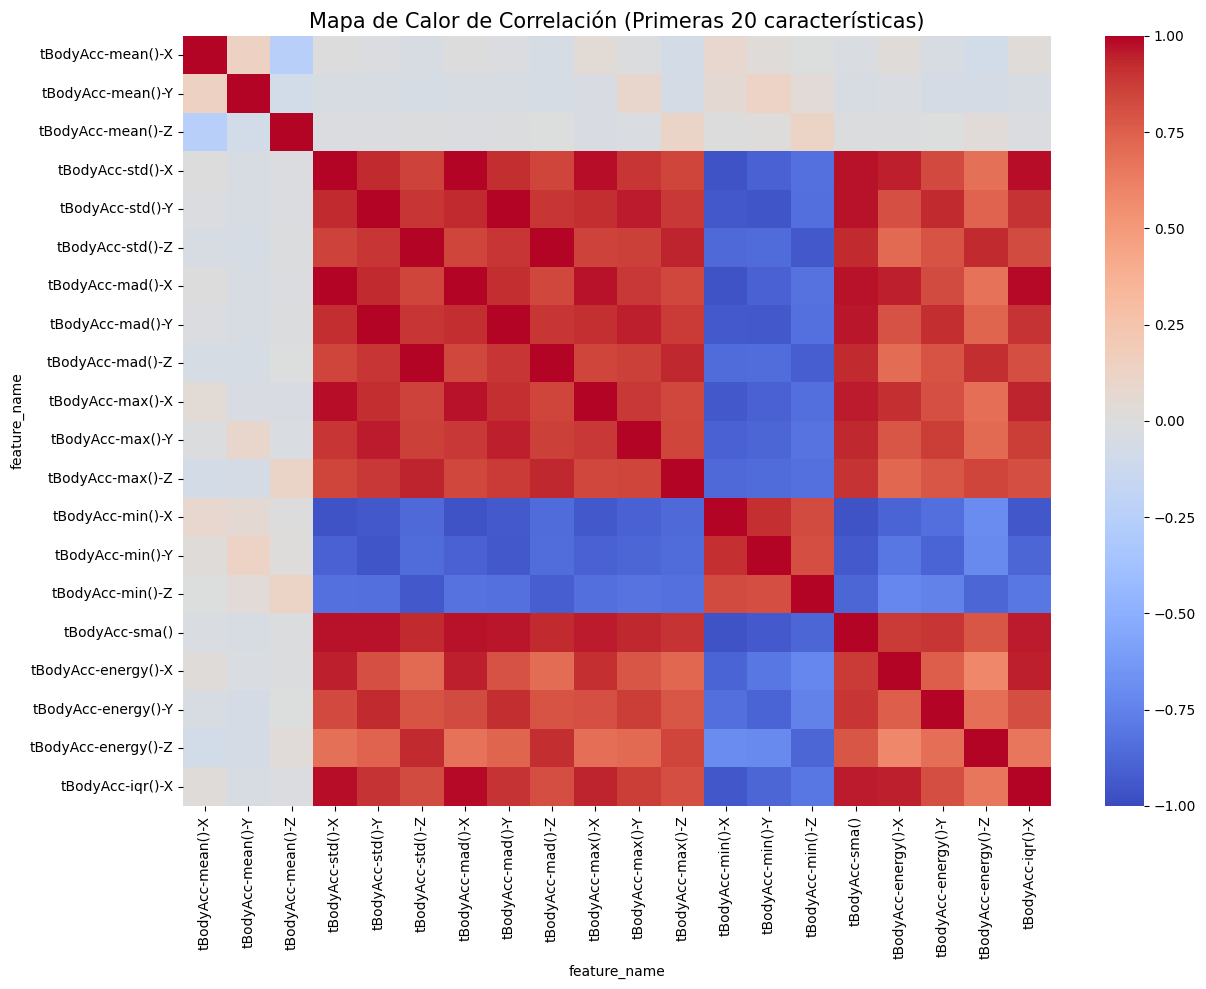

In [9]:
subset_features = X_train.columns[:20] 
corr_matrix = X_train[subset_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación (Primeras 20 características)', fontsize=15)
plt.show()

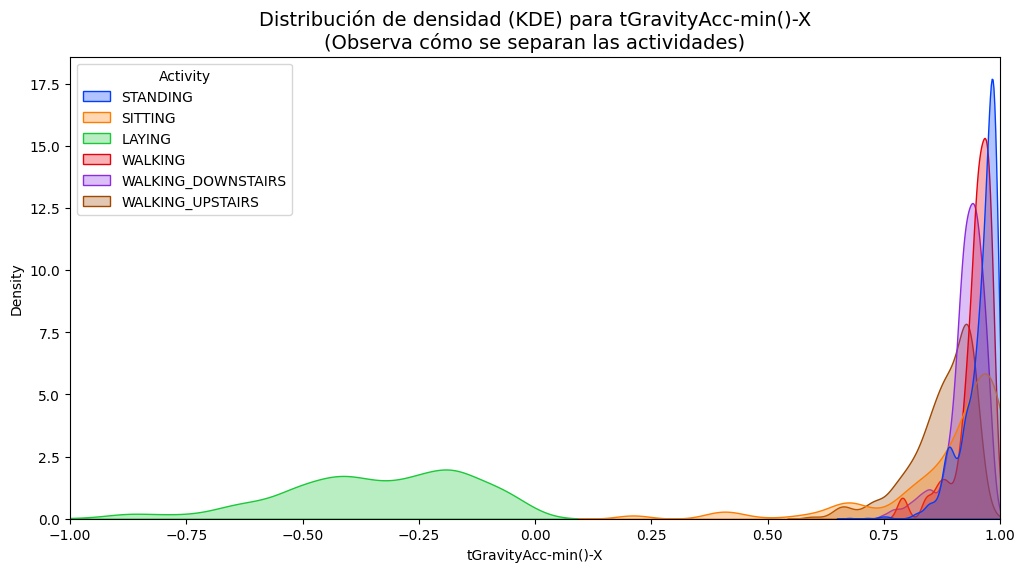

In [10]:
discriminative_feat = 'tGravityAcc-min()-X'

plt.figure(figsize=(12, 6))
sns.kdeplot(data=plot_data, x=discriminative_feat, hue='Activity', fill=True, common_norm=False, palette='bright', alpha=0.3)
plt.title(f'Distribución de densidad (KDE) para {discriminative_feat}\n(Observa cómo se separan las actividades)', fontsize=14)
plt.xlim(-1, 1)
plt.show()

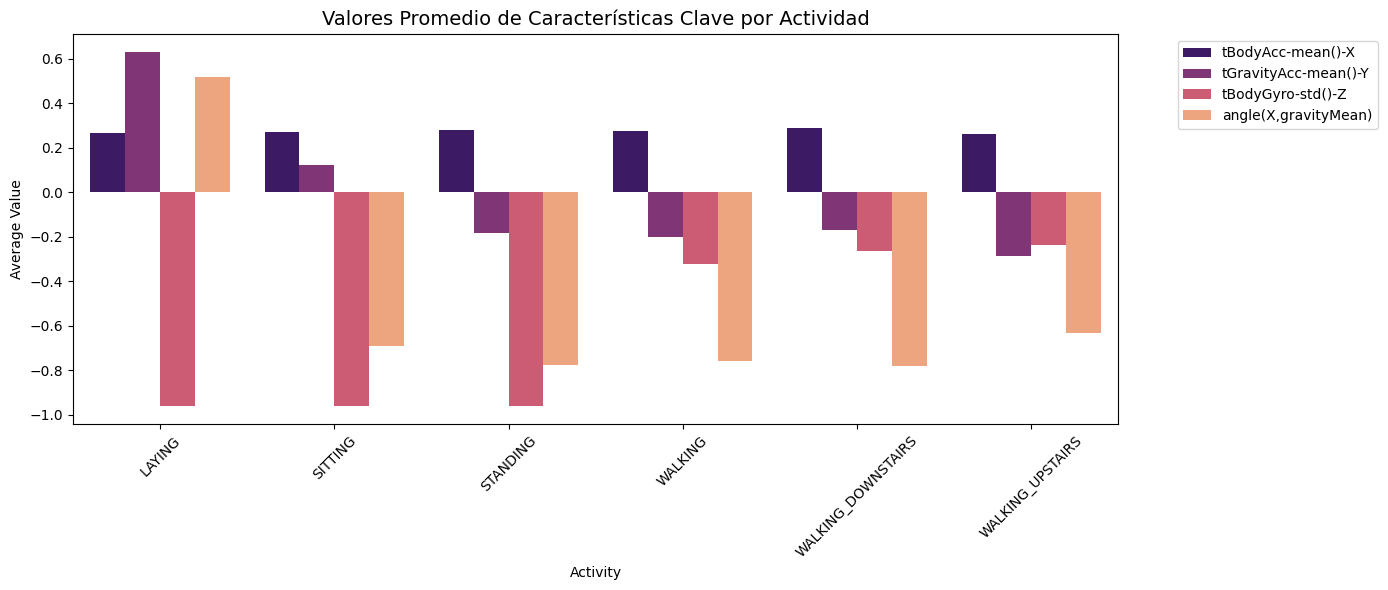

In [11]:
avg_values = plot_data.groupby('Activity')[selected_features].mean().reset_index()
avg_melted = avg_values.melt(id_vars='Activity', var_name='Feature', value_name='Average Value')

plt.figure(figsize=(14, 6))
sns.barplot(x='Activity', y='Average Value', hue='Feature', data=avg_melted, palette='magma')
plt.title('Valores Promedio de Características Clave por Actividad', fontsize=14)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Preparación de datos

In [12]:
min_val_original = X_train.min().min()
max_val_original = X_train.max().max()

print(f"Rango original de valores: [{min_val_original:.6f}, {max_val_original:.6f}]")

cols_out_range = X_train.columns[(X_train.min() < -1) | (X_train.max() > 1)]
print(f"Características con valores fuera de [-1, 1]: {len(cols_out_range)}")

X_train_clean = X_train.clip(lower=-1.0, upper=1.0)
X_test_clean = X_test.clip(lower=-1.0, upper=1.0)

print("-> Se ha aplicado 'clipping' para ajustar valores al rango estricto [-1, 1].")

X_train_final = X_train_clean.astype('float64')
X_test_final = X_test_clean.astype('float64')

if isinstance(y_train, pd.DataFrame):
    y_train_final = y_train.iloc[:, 0].astype(int) 
    y_test_final = y_test.iloc[:, 0].astype(int)
else:
    y_train_final = y_train.astype(int)
    y_test_final = y_test.astype(int)
    
print("-> Estructuras convertidas a formatos compatibles con Sklearn (X: float64, y: int).")

print("\n--- DIMENSIONES FINALES DOCUMENTADAS ---")
print(f"Conjunto de Entrenamiento (X): {X_train_final.shape}")
print(f"Etiquetas de Entrenamiento (y): {y_train_final.shape}")
print(f"Conjunto de Prueba (X):        {X_test_final.shape}")
print(f"Etiquetas de Prueba (y):        {y_test_final.shape}")

assert X_train_final.shape[0] == y_train_final.shape[0], "Error: Desajuste filas Train"
assert X_test_final.shape[0] == y_test_final.shape[0], "Error: Desajuste filas Test"
print("-> Validación de integridad: EXITOSA")

Rango original de valores: [-1.000000, 1.000000]
Características con valores fuera de [-1, 1]: 0
-> Se ha aplicado 'clipping' para ajustar valores al rango estricto [-1, 1].
-> Estructuras convertidas a formatos compatibles con Sklearn (X: float64, y: int).

--- DIMENSIONES FINALES DOCUMENTADAS ---
Conjunto de Entrenamiento (X): (7352, 561)
Etiquetas de Entrenamiento (y): (7352,)
Conjunto de Prueba (X):        (2947, 561)
Etiquetas de Prueba (y):        (2947,)
-> Validación de integridad: EXITOSA


# Modelos de Clasificación Base

### Modelos lineales y de distancia

In [13]:
k_values = [1, 3, 5, 7]
cv_scores = {}

print("Ejecutando Validación Cruzada para k-NN (5 folds)...")
for k in k_values:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, X_train_final, y_train_final, cv=5, scoring='accuracy')
    cv_scores[k] = scores.mean()
    print(f"k={k}: Accuracy Promedio CV = {scores.mean():.4f}")

optimal_k = max(cv_scores, key=cv_scores.get)
print(f"\n-> El valor óptimo de k identificado es: {optimal_k} (Acc: {cv_scores[optimal_k]:.4f})")

models_to_run = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=254),
}

for k in k_values:
    models_to_run[f'k-NN (k={k})'] = KNeighborsClassifier(n_neighbors=k)

results_list = []
confusion_matrices = {}


Ejecutando Validación Cruzada para k-NN (5 folds)...
k=1: Accuracy Promedio CV = 0.8792
k=3: Accuracy Promedio CV = 0.8919
k=5: Accuracy Promedio CV = 0.8968
k=7: Accuracy Promedio CV = 0.8996

-> El valor óptimo de k identificado es: 7 (Acc: 0.8996)


In [14]:
for name, model in models_to_run.items():
    start_time = time.time()
    model.fit(X_train_final, y_train_final)
    end_time = time.time()
    training_time = end_time - start_time
    
    y_pred = model.predict(X_test_final)
    acc = accuracy_score(y_test_final, y_pred)
    cm = confusion_matrix(y_test_final, y_pred)
    
    results_list.append({
        'Modelo': name,
        'Accuracy': acc,
        'Tiempo Entrenamiento (s)': training_time
    })
    confusion_matrices[name] = cm

results_df = pd.DataFrame(results_list).sort_values(by='Accuracy', ascending=False)

print("\n--- TABLA RESUMEN DE RENDIMIENTO ---")
display(results_df)

C:\Users\seba0\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



--- TABLA RESUMEN DE RENDIMIENTO ---


,Modelo,Accuracy,Tiempo Entrenamiento (s)
0,Logistic Regression,0.960977,1.722537
4,k-NN (k=7),0.903291,0.023525
3,k-NN (k=5),0.901595,0.019858
2,k-NN (k=3),0.890736,0.017160
1,k-NN (k=1),0.878521,0.016673


In [15]:
for name, cm in confusion_matrices.items():
    print(f"\nModelo: {name}")
    labels = sorted(activity_labels['activity_name'].unique()) if 'activity_labels' in locals() else None
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    print(df_cm)


Modelo: Logistic Regression
                    LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
LAYING                 493        0         3        0                   0   
SITTING                 25      445         1        0                   0   
STANDING                 3       12       405        0                   0   
WALKING                  0        3         0      431                  57   
WALKING_DOWNSTAIRS       0        0         0       11                 521   
WALKING_UPSTAIRS         0        0         0        0                   0   

                    WALKING_UPSTAIRS  
LAYING                             0  
SITTING                            0  
STANDING                           0  
WALKING                            0  
WALKING_DOWNSTAIRS                 0  
WALKING_UPSTAIRS                 537  

Modelo: k-NN (k=1)
                    LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
LAYING                 473        8        15        

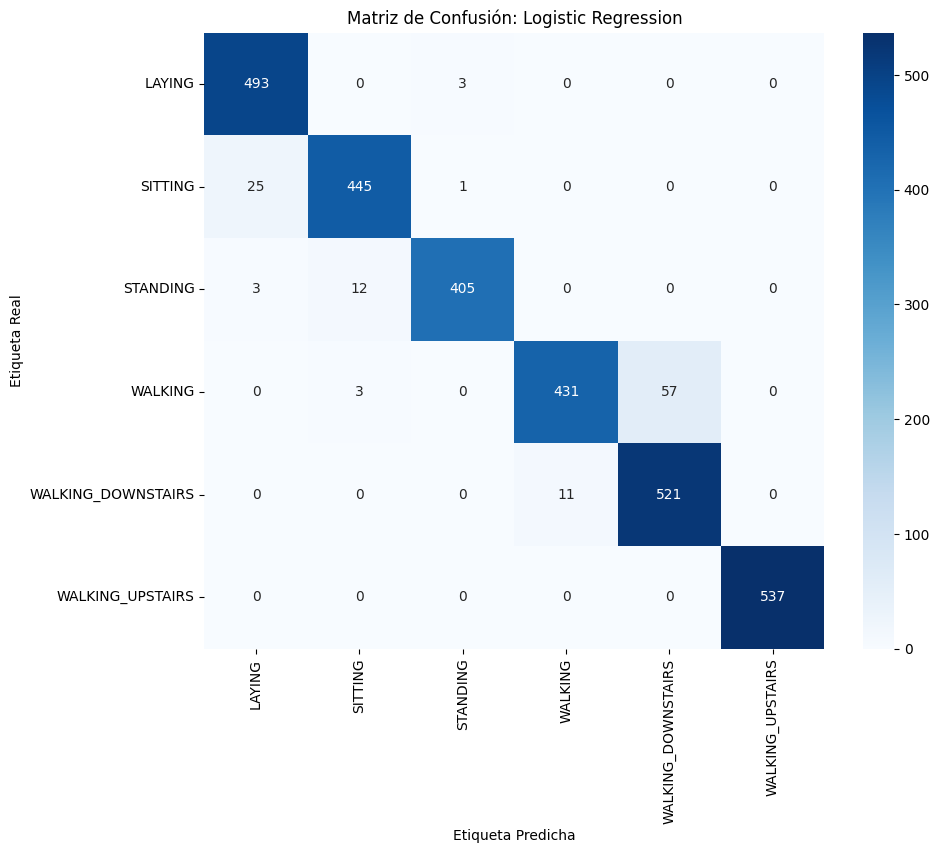

In [16]:
best_model_name = results_df.iloc[0]['Modelo']
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrices[best_model_name], annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.title(f'Matriz de Confusión: {best_model_name}')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

### Modelos probabilísticos y basados en árboles

In [17]:
models_prob_tree = {
    'Gaussian Naive Bayes': GaussianNB(),
    'Random Forest (n=100)': RandomForestClassifier(n_estimators=100, random_state=254, n_jobs=-1),
    'SVM (Kernel RBF)': SVC(kernel='rbf', random_state=42)
}

depths = [5, 10, 20, None]
for d in depths:
    name = f'Decision Tree (Depth={d})'
    models_prob_tree[name] = DecisionTreeClassifier(max_depth=d, random_state=42)

results_2b = []
best_f1_macro = 0
best_model_name = ""
best_y_pred = None

print(f"{'Modelo':<30} | {'Macro F1':<10} | {'Tiempo (s)':<10}")
print("-" * 55)

for name, model in models_prob_tree.items():
    start = time.time()
    model.fit(X_train_final, y_train_final)
    end = time.time()
    train_time = end - start
    
    y_pred = model.predict(X_test_final)
    
    f1_macro = f1_score(y_test_final, y_pred, average='macro')
    
    results_2b.append({
        'Modelo': name,
        'Macro F1': f1_macro,
        'Tiempo (s)': train_time
    })
    
    print(f"{name:<30} | {f1_macro:.4f}     | {train_time:.2f}")

    print(f"\nReporte detallado por clase para: {name}")
    activity_names_list = sorted(activity_labels['activity_name'].unique())
    print(classification_report(y_test_final, y_pred, target_names=activity_names_list))
    print("-" * 80)
    
    if f1_macro > best_f1_macro:
        best_f1_macro = f1_macro
        best_model_name = name
        best_y_pred = y_pred

cm = confusion_matrix(y_test_final, best_y_pred)

Modelo                         | Macro F1   | Tiempo (s)
-------------------------------------------------------
Gaussian Naive Bayes           | 0.7672     | 0.06

Reporte detallado por clase para: Gaussian Naive Bayes
                    precision    recall  f1-score   support

            LAYING       0.82      0.84      0.83       496
           SITTING       0.76      0.96      0.84       471
          STANDING       0.83      0.61      0.70       420
           WALKING       0.58      0.75      0.65       491
WALKING_DOWNSTAIRS       0.80      0.86      0.83       532
  WALKING_UPSTAIRS       0.96      0.60      0.74       537

          accuracy                           0.77      2947
         macro avg       0.79      0.77      0.77      2947
      weighted avg       0.79      0.77      0.77      2947

--------------------------------------------------------------------------------
Random Forest (n=100)          | 0.9266     | 1.18

Reporte detallado por clase para: Random For

In [18]:
df_results_2b = pd.DataFrame(results_2b).sort_values(by='Macro F1', ascending=False)
display(df_results_2b)

,Modelo,Macro F1,Tiempo (s)
2,SVM (Kernel RBF),0.949907,1.061934
1,Random Forest (n=100),0.926597,1.180980
6,Decision Tree (Depth=None),0.859469,4.344402
5,Decision Tree (Depth=20),0.859469,4.341868
4,Decision Tree (Depth=10),0.859044,3.360615
3,Decision Tree (Depth=5),0.831885,1.871862
0,Gaussian Naive Bayes,0.767235,0.063233



Generando Matriz de Confusión para el Mejor Modelo: SVM (Kernel RBF)


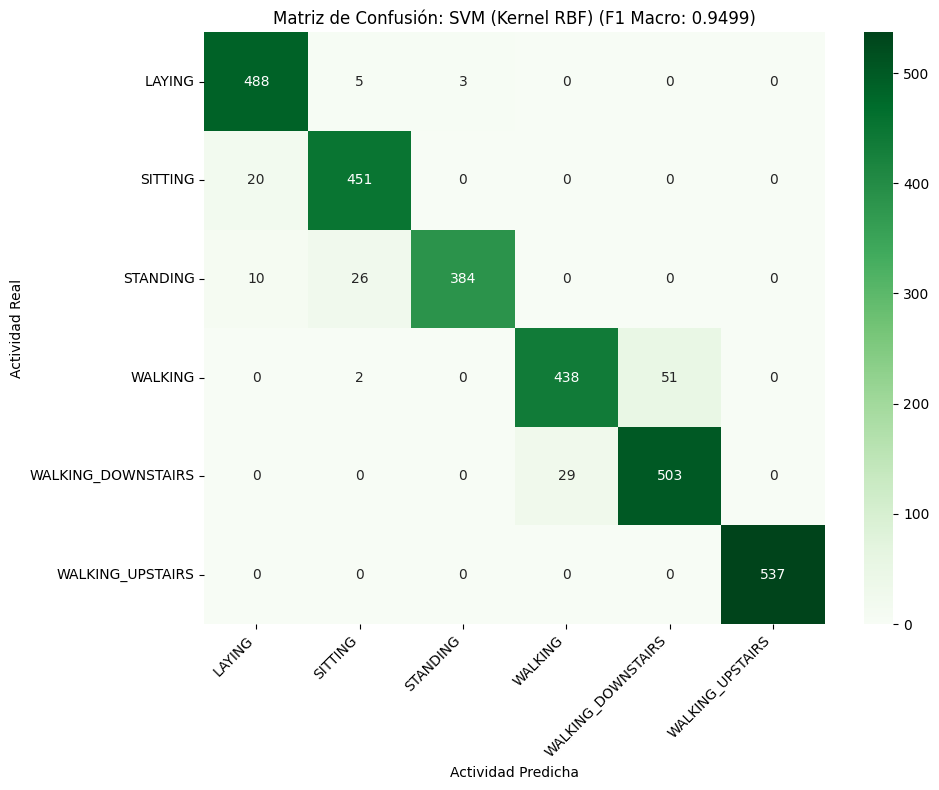

In [19]:
print(f"\nGenerando Matriz de Confusión para el Mejor Modelo: {best_model_name}")
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=activity_names_list, 
            yticklabels=activity_names_list)
plt.title(f'Matriz de Confusión: {best_model_name} (F1 Macro: {best_f1_macro:.4f})')
plt.ylabel('Actividad Real')
plt.xlabel('Actividad Predicha')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Selección y Análisis de Características

### Análisis de importancia de características

In [20]:
rf_selector = RandomForestClassifier(n_estimators=100, random_state=254, n_jobs=-1)
rf_selector.fit(X_train_final, y_train_final)

importances = rf_selector.feature_importances_
feature_imp_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_50_features = feature_imp_df.head(50)
top_50_names = top_50_features['Feature'].tolist()

print("Top 5 características más importantes:")
print(top_50_features.head(5))


def analizar_tipo(feature_name):
    sensor = 'Otro'
    dominio = 'Otro'
    
    if 'Acc' in feature_name: sensor = 'Acelerómetro'
    elif 'Gyro' in feature_name: sensor = 'Giroscopio'
    
    if feature_name.startswith('t'): dominio = 'Tiempo'
    elif feature_name.startswith('f'): dominio = 'Frecuencia'
    
    return sensor, dominio

analysis_results = [analizar_tipo(f) for f in top_50_names]
df_analysis = pd.DataFrame(analysis_results, columns=['Sensor', 'Dominio'])

print("\n--- Análisis del Top 50 Características ---")
print("Por Sensor:")
print(df_analysis['Sensor'].value_counts())
print("\nPor Dominio:")
print(df_analysis['Dominio'].value_counts())


Top 5 características más importantes:
                    Feature  Importance
558    angle(X,gravityMean)    0.030236
52      tGravityAcc-min()-X    0.028451
559    angle(Y,gravityMean)    0.028189
56   tGravityAcc-energy()-X    0.028074
41     tGravityAcc-mean()-Y    0.025798

--- Análisis del Top 50 Características ---
Por Sensor:
Sensor
Acelerómetro    47
Otro             3
Name: count, dtype: int64

Por Dominio:
Dominio
Tiempo        32
Frecuencia    15
Otro           3
Name: count, dtype: int64


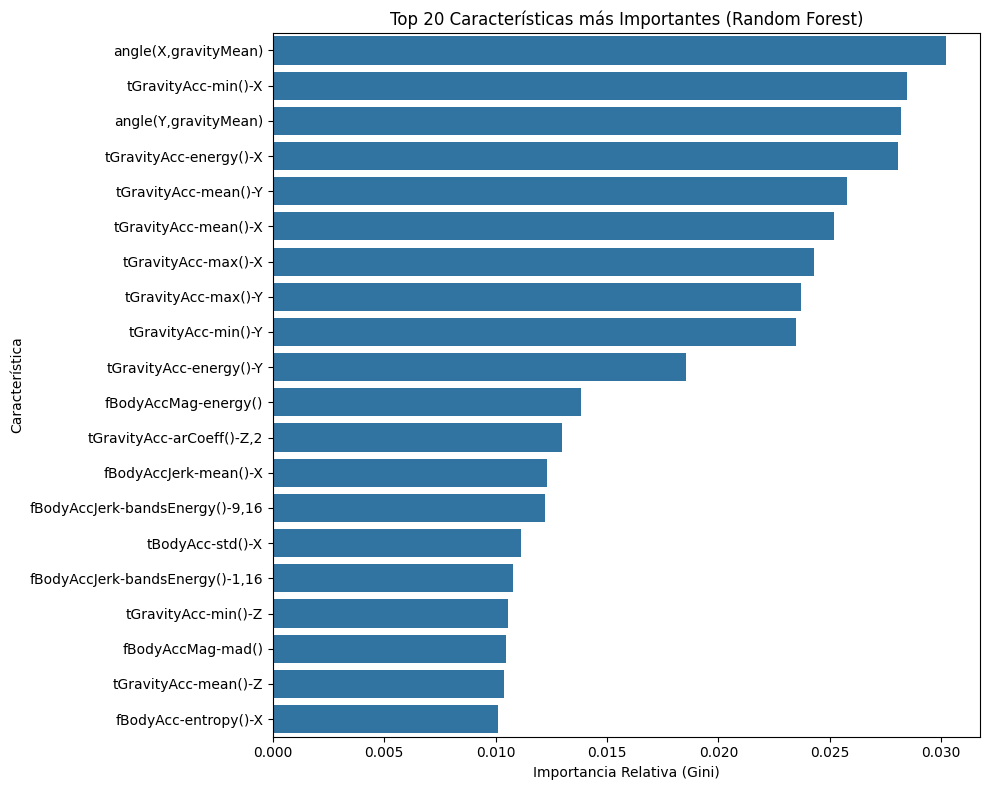

In [21]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(20))
plt.title('Top 20 Características más Importantes (Random Forest)')
plt.xlabel('Importancia Relativa (Gini)')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

In [22]:
modelo_a_reentrenar = RandomForestClassifier(n_estimators=100, random_state=254) 
subsets = [50, 100, 200]
results_selection = []

print(f"\nReentrenando modelo ({modelo_a_reentrenar.__class__.__name__}) con características reducidas...")

for n in subsets:

    top_n_names = feature_imp_df.head(n)['Feature'].tolist()
    
    X_train_subset = X_train_final[top_n_names]
    X_test_subset = X_test_final[top_n_names]
    

    start = time.time()
    modelo_a_reentrenar.fit(X_train_subset, y_train_final)
    end = time.time()
    

    y_pred_sub = modelo_a_reentrenar.predict(X_test_subset)
    acc = accuracy_score(y_test_final, y_pred_sub)
    f1 = f1_score(y_test_final, y_pred_sub, average='macro')
    
    results_selection.append({
        'N Features': n,
        'Accuracy': acc,
        'Macro F1': f1,
        'Tiempo (s)': end - start
    })

df_selection = pd.DataFrame(results_selection)
print("\n--- Resultados de Selección de Características ---")
display(df_selection)


Reentrenando modelo (RandomForestClassifier) con características reducidas...

--- Resultados de Selección de Características ---


,N Features,Accuracy,Macro F1,Tiempo (s)
0,50,0.874449,0.873822,2.911510
1,100,0.910757,0.909410,4.636802
2,200,0.916525,0.914791,7.184171


### Reducción basada en varianza y correlación

In [23]:
var_threshold = 0.005
selector_var = VarianceThreshold(threshold=var_threshold)

selector_var.fit(X_train_final)

mask = selector_var.get_support()

X_train_var = X_train_final.loc[:, mask]
X_test_var = X_test_final.loc[:, mask]

print(f"Características originales: {X_train_final.shape[1]}")
print(f"Características tras filtro: {X_train_var.shape[1]}")
print(f"-> Se eliminaron {X_train_final.shape[1] - X_train_var.shape[1]} características.")

Características originales: 561
Características tras filtro: 554
-> Se eliminaron 7 características.


In [24]:
corr_matrix = X_train_var.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

X_train_reduced = X_train_var.drop(columns=to_drop)
X_test_reduced = X_test_var.drop(columns=to_drop)

print(f"Características tras filtro de correlación (> 0.95): {X_train_reduced.shape[1]}")
print(f"-> Se eliminaron {len(to_drop)} características adicionales por redundancia.")
print(f"-> Total características finales: {X_train_reduced.shape[1]}")


Características tras filtro de correlación (> 0.95): 195
-> Se eliminaron 359 características adicionales por redundancia.
-> Total características finales: 195


In [25]:
models_reduced = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', random_state=254),
    'k-NN (k=3)': KNeighborsClassifier(n_neighbors=3),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

results_reduction = []

print("\nEntrenando modelos con dataset reducido...")
for name, model in models_reduced.items():
    # Medir tiempo
    start = time.time()
    model.fit(X_train_reduced, y_train_final)
    end = time.time()
    train_time = end - start
    
    # Evaluar
    y_pred = model.predict(X_test_reduced)
    acc = accuracy_score(y_test_final, y_pred)
    
    results_reduction.append({
        'Modelo': name,
        'Num Features': X_train_reduced.shape[1],
        'Accuracy Reduced': acc,
        'Tiempo Reduced (s)': train_time
    })
df_reduction = pd.DataFrame(results_reduction)
print("\n--- TABLA DE RESULTADOS: CONJUNTO REDUCIDO ---")
display(df_reduction)


Entrenando modelos con dataset reducido...


C:\Users\seba0\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



--- TABLA DE RESULTADOS: CONJUNTO REDUCIDO ---


,Modelo,Num Features,Accuracy Reduced,Tiempo Reduced (s)
0,Logistic Regression,195,0.949779,0.508521
1,k-NN (k=3),195,0.856464,0.005675
2,Random Forest,195,0.945707,0.724313


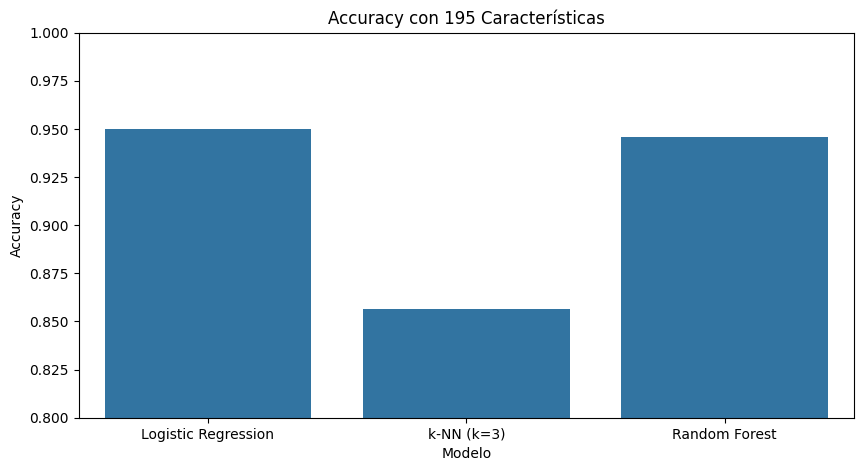

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Modelo', y='Accuracy Reduced', data=df_reduction)
plt.ylim(0.8, 1.0) # Ajustar escala para ver diferencias sutiles
plt.title(f'Accuracy con {X_train_reduced.shape[1]} Características')
plt.ylabel('Accuracy')
plt.show()

# Optimización y Análisis de Errores

Análisis detallado de confusiones

In [27]:
best_model = RandomForestClassifier(n_estimators=100, random_state=254)
best_model.fit(X_train_final, y_train_final)
y_pred_base = best_model.predict(X_test_final)


cm = confusion_matrix(y_test_final, y_pred_base)
classes = sorted(activity_labels['activity_name'].unique()) 

cm_df = pd.DataFrame(cm, index=classes, columns=classes)

cm_no_diag = cm_df.copy()
np.fill_diagonal(cm_no_diag.values, 0)

max_error_val = cm_no_diag.max().max()
error_pos = cm_no_diag.stack().idxmax() 

print(f"\nMayor confusión: {max_error_val} muestras.")
print(f"Actividad REAL: '{error_pos[0]}' predicha erróneamente como '{error_pos[1]}'.")


Mayor confusión: 51 muestras.
Actividad REAL: 'WALKING' predicha erróneamente como 'WALKING_DOWNSTAIRS'.


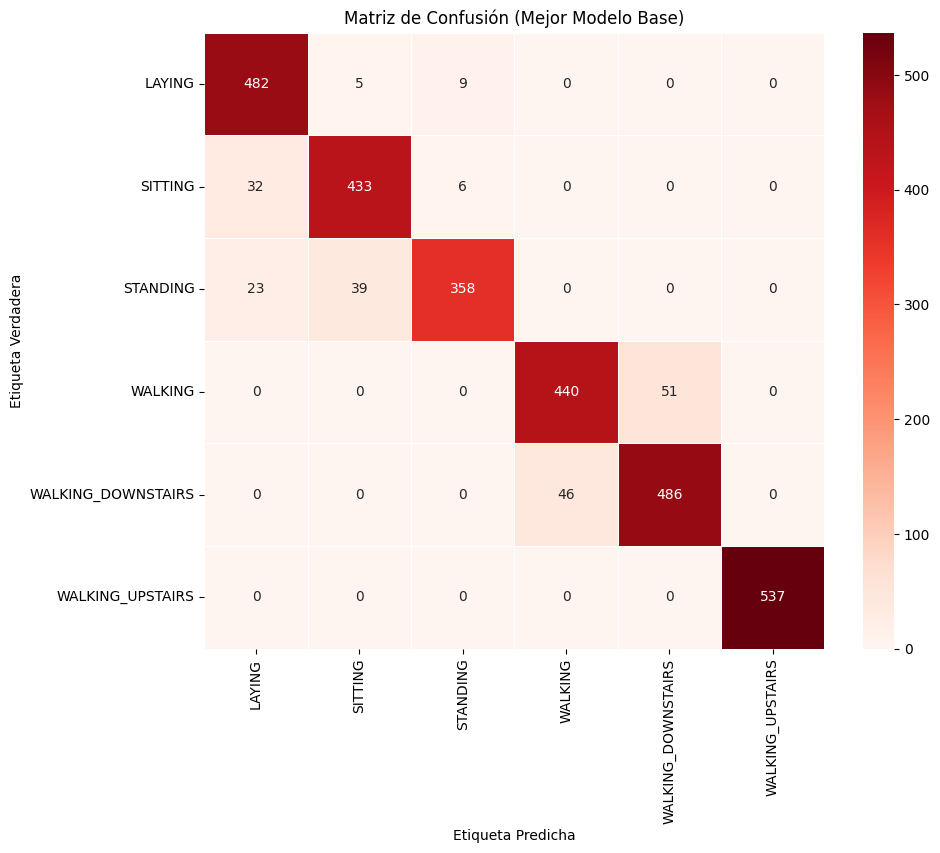

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Reds', linewidths=.5)
plt.title('Matriz de Confusión (Mejor Modelo Base)')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()


--- Análisis de Características Distintivas ---
Analizando par confundido: WALKING vs WALKING_DOWNSTAIRS


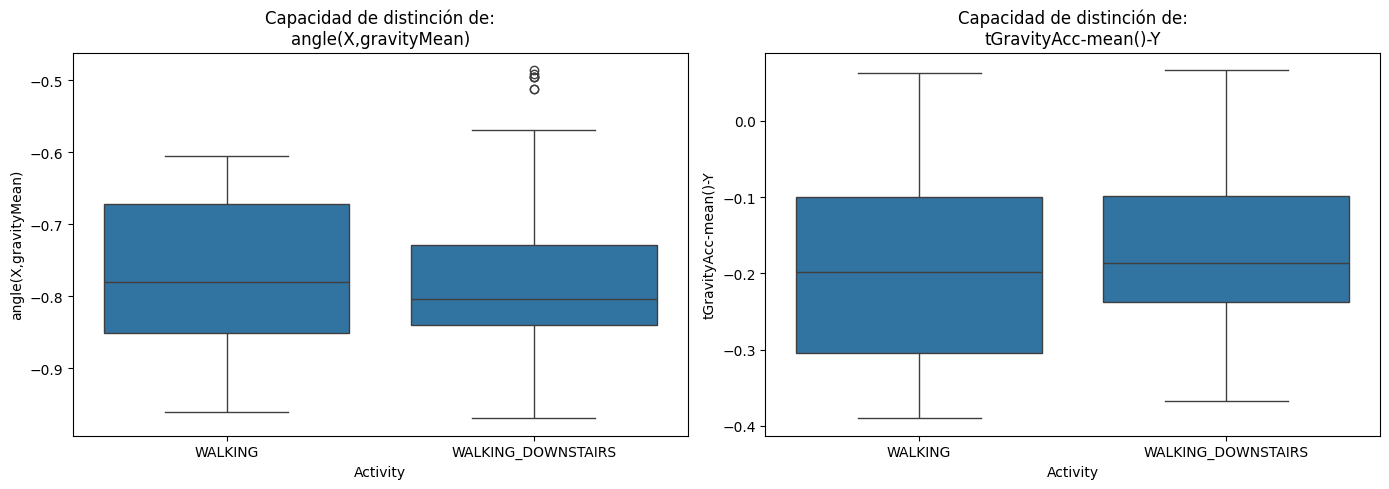

In [29]:
print("\n--- Análisis de Características Distintivas ---")
print(f"Analizando par confundido: {error_pos[0]} vs {error_pos[1]}")

distinguishing_feats = ['angle(X,gravityMean)', 'tGravityAcc-mean()-Y', 'tBodyAcc-energy()-X']

subset_mask = y_test['activity_name'].isin([error_pos[0], error_pos[1]])
X_subset = X_test_final[subset_mask].copy()
X_subset['Activity'] = y_test['activity_name'][subset_mask]

plt.figure(figsize=(14, 5))
for i, feat in enumerate(distinguishing_feats[:2]):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x='Activity', y=feat, data=X_subset)
    plt.title(f'Capacidad de distinción de:\n{feat}')
plt.tight_layout()
plt.show()

### Estrategias de mejora

In [30]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=254), param_grid, cv=3, scoring='f1_macro', n_jobs=-1)
grid_rf.fit(X_train_final, y_train_final)

best_rf_opt = grid_rf.best_estimator_
print(f"Mejores parámetros encontrados: {grid_rf.best_params_}")

Mejores parámetros encontrados: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [31]:
clf1 = best_rf_opt
clf2 = SVC(kernel='rbf', probability=True, random_state=254)
clf3 = LogisticRegression(max_iter=1000, random_state=254)

eclf = VotingClassifier(estimators=[('rf', clf1), ('svm', clf2), ('lr', clf3)], voting='soft')
eclf.fit(X_train_final, y_train_final)

print("Ensemble (Voting) entrenado exitosamente.")

Ensemble (Voting) entrenado exitosamente.



--- Comparación de Rendimiento Global (Macro F1) ---
Modelo Base:       0.9266
Modelo Optimizado: 0.9240
Ensemble Voting:   0.9581


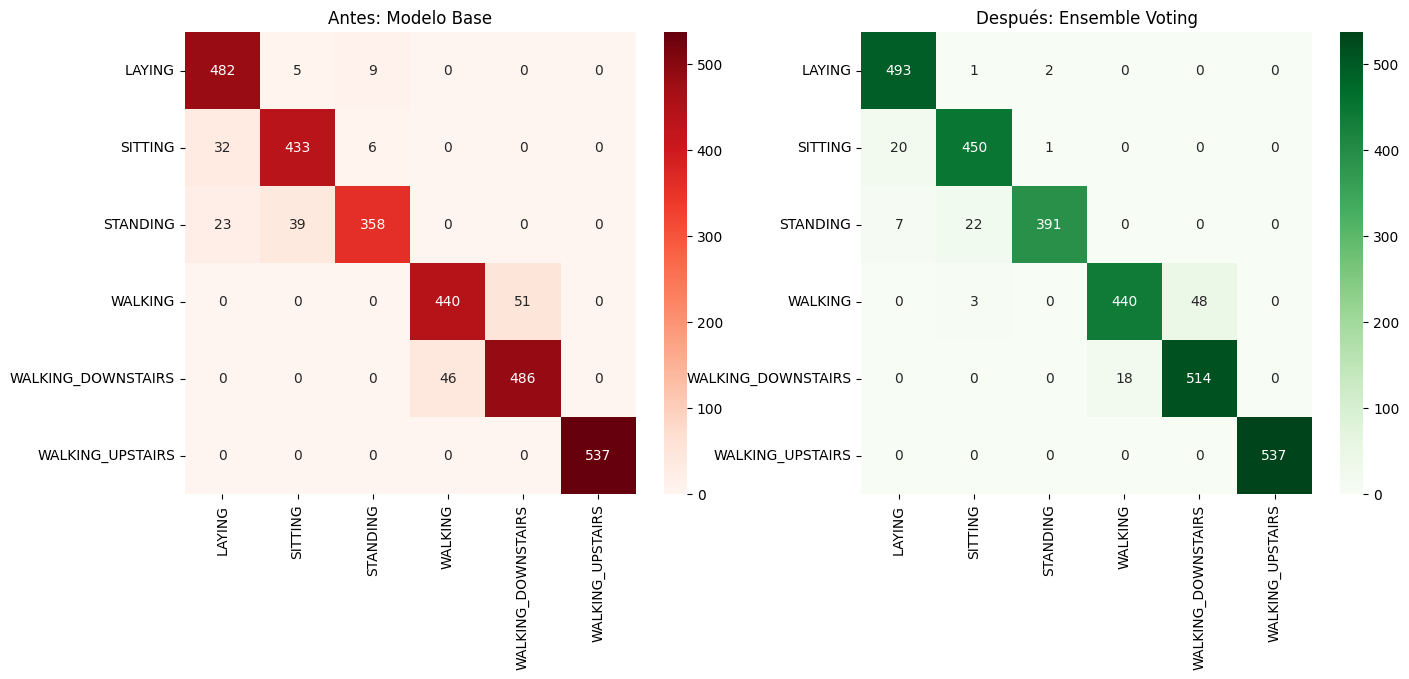

In [32]:
y_pred_opt = best_rf_opt.predict(X_test_final)
y_pred_ens = eclf.predict(X_test_final)

f1_base = f1_score(y_test_final, y_pred_base, average='macro')
f1_opt = f1_score(y_test_final, y_pred_opt, average='macro')
f1_ens = f1_score(y_test_final, y_pred_ens, average='macro')

print(f"\n--- Comparación de Rendimiento Global (Macro F1) ---")
print(f"Modelo Base:       {f1_base:.4f}")
print(f"Modelo Optimizado: {f1_opt:.4f}")
print(f"Ensemble Voting:   {f1_ens:.4f}")

cm_ens = confusion_matrix(y_test_final, y_pred_ens)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Reds', ax=ax[0])
ax[0].set_title('Antes: Modelo Base')
sns.heatmap(pd.DataFrame(cm_ens, index=classes, columns=classes), annot=True, fmt='d', cmap='Greens', ax=ax[1])
ax[1].set_title('Después: Ensemble Voting')
plt.show()

In [33]:
report_base = classification_report(y_test_final, y_pred_base, target_names=classes, output_dict=True)
report_ens = classification_report(y_test_final, y_pred_ens, target_names=classes, output_dict=True)

print("\n--- Mejora en F1-Score por Clase ---")
mejora_data = []
for cls in classes:
    f1_b = report_base[cls]['f1-score']
    f1_e = report_ens[cls]['f1-score']
    mejora_data.append({
        'Clase': cls,
        'F1 Base': f1_b,
        'F1 Ensemble': f1_e,
        'Mejora': f1_e - f1_b
    })

df_mejora = pd.DataFrame(mejora_data).sort_values(by='Mejora', ascending=False)
display(df_mejora)


--- Mejora en F1-Score por Clase ---


,Clase,F1 Base,F1 Ensemble,Mejora
2,STANDING,0.902900,0.960688,0.057788
0,LAYING,0.933204,0.970472,0.037268
1,SITTING,0.913502,0.950370,0.036867
4,WALKING_DOWNSTAIRS,0.909261,0.939671,0.030410
3,WALKING,0.900716,0.927292,0.026575
5,WALKING_UPSTAIRS,1.000000,1.000000,0.000000


# Conclusiones

Resumen de los resultados del análisis y los modelos entrenados.

### Tabla resumen: mejor modelo por métrica

Se muestra el mejor modelo identificado para cada métrica evaluada (accuracy, macro-F1 y conjuntos reducidos), junto con su valor y tiempo de entrenamiento.

In [39]:
# Unificamos todos los resultados en un solo DataFrame
df_resumen = pd.concat([
    results_df.rename(columns={'Accuracy': 'Valor', 'Tiempo Entrenamiento (s)': 'Tiempo (s)'})
               .assign(Métrica='Accuracy')[['Métrica','Modelo','Valor','Tiempo (s)']],

    df_results_2b.rename(columns={'Macro F1': 'Valor', 'Tiempo (s)': 'Tiempo (s)'})
                 .assign(Métrica='Macro F1')[['Métrica','Modelo','Valor','Tiempo (s)']],

    df_reduction.rename(columns={'Accuracy Reduced': 'Valor', 'Tiempo Reduced (s)': 'Tiempo (s)'})
                .assign(Métrica='Accuracy (Reducido)')[['Métrica','Modelo','Valor','Tiempo (s)']],

    pd.DataFrame([
        {'Métrica': 'Macro F1 (Óptimo)',   'Modelo': 'Random Forest Optimizado', 'Valor': f1_opt, 'Tiempo (s)': 0},
        {'Métrica': 'Macro F1 (Ensemble)', 'Modelo': 'Voting Classifier',        'Valor': f1_ens, 'Tiempo (s)': 0}
    ])
])

# Agrupamos por métrica y encontramos el mejor para cada una
mejor_por_metrica = []
for metrica in df_resumen['Métrica'].unique():
    subset = df_resumen[df_resumen['Métrica'] == metrica]
    mejor_modelo = subset.loc[subset['Valor'].idxmax()]
    mejor_por_metrica.append(mejor_modelo)

df_mejores = pd.DataFrame(mejor_por_metrica)[['Métrica', 'Modelo', 'Valor', 'Tiempo (s)']]

print("\n Mejor modelo por cada métrica")
display(df_mejores.round(4))

print("\n Resultados ordenados")
display(df_resumen.sort_values("Métrica").round(4))



 Mejor modelo por cada métrica


,Métrica,Modelo,Valor,Tiempo (s)
0,Accuracy,Logistic Regression,0.9610,1.7225
2,Macro F1,SVM (Kernel RBF),0.9499,1.0619
0,Accuracy (Reducido),Logistic Regression,0.9498,0.5085
0,Macro F1 (Óptimo),Random Forest Optimizado,0.9240,0.0000
1,Macro F1 (Ensemble),Voting Classifier,0.9581,0.0000



 Resultados ordenados


,Métrica,Modelo,Valor,Tiempo (s)
0,Accuracy,Logistic Regression,0.9610,1.7225
4,Accuracy,k-NN (k=7),0.9033,0.0235
3,Accuracy,k-NN (k=5),0.9016,0.0199
2,Accuracy,k-NN (k=3),0.8907,0.0172
1,Accuracy,k-NN (k=1),0.8785,0.0167
2,Accuracy (Reducido),Random Forest,0.9457,0.7243
1,Accuracy (Reducido),k-NN (k=3),0.8565,0.0057
0,Accuracy (Reducido),Logistic Regression,0.9498,0.5085
0,Macro F1,Gaussian Naive Bayes,0.7672,0.0632
3,Macro F1,Decision Tree (Depth=5),0.8319,1.8719


### Características más importantes para la clasificación

Breve análisis de las características más relevantes (top K) según Random Forest y su distribución por sensor / dominio.

In [43]:
print("Análisis de características más importantes")

# K características más importantes
top_k = 5
top_features = feature_imp_df.head(top_k)

def clasificar_feature(nombre):
    sensor = 'Acelerómetro' if 'Acc' in nombre else ('Giroscopio' if 'Gyro' in nombre else 'Otra')
    dominio = 'Tiempo' if nombre.startswith('t') else ('Frecuencia' if nombre.startswith('f') else 'Ángulo')
    return sensor, dominio

print(f"\nTop {top_k} Características más Importantes para la Clasificación:")

for i, (_, row) in enumerate(top_features.iterrows(), 1):
    sensor, dominio = clasificar_feature(row['Feature'])
    print(f"\n{i}. {row['Feature']}")
    print(f"   Importancia: {row['Importance']:.4f}")
    print(f"   Tipo Sensor: {sensor}")
    print(f"   Dominio: {dominio}")

# Estadísticas agregadas
print("\nCaracterísticas importantes por tipo:")

top_20 = feature_imp_df.head(20)
clasificaciones = [clasificar_feature(f) for f in top_20['Feature']]

sensors = pd.Series([s for s, _ in clasificaciones]).value_counts()
domains = pd.Series([d for _, d in clasificaciones]).value_counts()

print("\nPor Sensor (Top 20):")
for sensor, count in sensors.items():
    print(f"  {sensor}: {count} características ({(count/20)*100:.1f}%)")

print("\nPor Dominio (Top 20):")
for dominio, count in domains.items():
    print(f"  {dominio}: {count} características ({(count/20)*100:.1f}%)")


Análisis de características más importantes

Top 5 Características más Importantes para la Clasificación:

1. angle(X,gravityMean)
   Importancia: 0.0302
   Tipo Sensor: Otra
   Dominio: Ángulo

2. tGravityAcc-min()-X
   Importancia: 0.0285
   Tipo Sensor: Acelerómetro
   Dominio: Tiempo

3. angle(Y,gravityMean)
   Importancia: 0.0282
   Tipo Sensor: Otra
   Dominio: Ángulo

4. tGravityAcc-energy()-X
   Importancia: 0.0281
   Tipo Sensor: Acelerómetro
   Dominio: Tiempo

5. tGravityAcc-mean()-Y
   Importancia: 0.0258
   Tipo Sensor: Acelerómetro
   Dominio: Tiempo

Características importantes por tipo:

Por Sensor (Top 20):
  Acelerómetro: 18 características (90.0%)
  Otra: 2 características (10.0%)

Por Dominio (Top 20):
  Tiempo: 12 características (60.0%)
  Frecuencia: 6 características (30.0%)
  Ángulo: 2 características (10.0%)


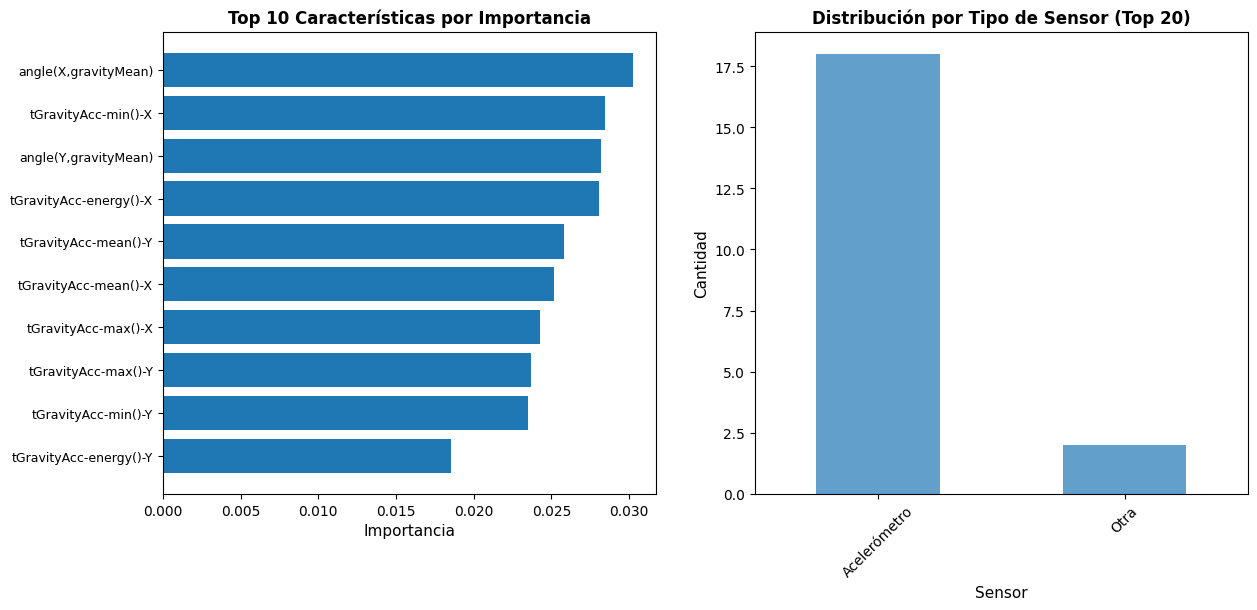

In [44]:
# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Top características
top_n = 10
top_10 = feature_imp_df.head(top_n)
axes[0].barh(range(len(top_10)), top_10['Importance'].values)
axes[0].set_yticks(range(len(top_10)))
axes[0].set_yticklabels(top_10['Feature'].values, fontsize=9)
axes[0].set_xlabel('Importancia', fontsize=11)
axes[0].set_title(f'Top {top_n} Características por Importancia', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()

# Gráfico 2: Distribución por tipo
sensors.plot(kind='bar', ax=axes[1], alpha=0.7)
axes[1].set_title('Distribución por Tipo de Sensor (Top 20)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Sensor', fontsize=11)
axes[1].set_ylabel('Cantidad', fontsize=11)
axes[1].tick_params(axis='x', rotation=45)

plt.show()

Las características del Acelerómetro en el dominio del Tiempo son dominantes en la clasificación, indicando que la detección de actividades se basa principalmente en patrones de movimiento de corto plazo.

### Pares de actividades más difíciles de distinguir

Análisis de los pares con mayor número de errores en la matriz de confusión y comparación de sus características clave.

In [54]:
print("Análisis de confusiones entre pares de actividades")

# Identificar pares más confundidos
cm_no_diag = cm_df.copy()
np.fill_diagonal(cm_no_diag.values, 0)

df_confusion = (
    cm_no_diag.stack()
    .reset_index()
    .rename(columns={'level_0': 'Actividad Real', 'level_1': 'Predicción', 0: 'Errores'})
)

df_confusion['Par'] = df_confusion['Actividad Real'] + " → " + df_confusion['Predicción']
df_confusion = df_confusion.sort_values('Errores', ascending=False)

print("\nTop 5 Pares de Actividades Más Confundidas:")


top_confusions = df_confusion.head(5)
for i, row in enumerate(top_confusions.itertuples(), 1):
    print(f"\n{i}. {row.Par}: {row.Errores} errores")

# Análisis detallado del par más confundido

print("Análisis detallado: par más confundido")

worst_pair = top_confusions.iloc[0]
act_real, act_pred = worst_pair['Actividad Real'], worst_pair['Predicción']
num_errors = worst_pair['Errores']

print(f"\nActividades confundidas: {act_real} vs {act_pred}")
print(f"Número de errores: {num_errors}")

subset = plot_data[plot_data['Activity'].isin([act_real, act_pred])]

print("\nComparación de características clave:")

key_features = top_features['Feature'].head(3).tolist()
comparison_stats = []

for feature in key_features:
    real_mean = subset[subset['Activity'] == act_real][feature].mean()
    pred_mean = subset[subset['Activity'] == act_pred][feature].mean()
    diff = abs(real_mean - pred_mean)

    comparison_stats.append({
        'Característica': feature,
        act_real: real_mean,
        act_pred: pred_mean,
        'Diferencia': diff
    })

    print(f"\n{feature}:")
    print(f"  {act_real}: {real_mean:.4f}")
    print(f"  {act_pred}: {pred_mean:.4f}")
    print(f"  Diferencia: {diff:.4f}")

df_comparison = pd.DataFrame(comparison_stats)
display(df_comparison.round(4))




Análisis de confusiones entre pares de actividades

Top 5 Pares de Actividades Más Confundidas:

1. WALKING → WALKING_DOWNSTAIRS: 51 errores

2. WALKING_DOWNSTAIRS → WALKING: 46 errores

3. STANDING → SITTING: 39 errores

4. SITTING → LAYING: 32 errores

5. STANDING → LAYING: 23 errores
Análisis detallado: par más confundido

Actividades confundidas: WALKING vs WALKING_DOWNSTAIRS
Número de errores: 51

Comparación de características clave:

angle(X,gravityMean):
  WALKING: -0.7571
  WALKING_DOWNSTAIRS: -0.7783
  Diferencia: 0.0211

tGravityAcc-min()-X:
  WALKING: 0.9455
  WALKING_DOWNSTAIRS: 0.9272
  Diferencia: 0.0183

angle(Y,gravityMean):
  WALKING: 0.2205
  WALKING_DOWNSTAIRS: 0.1993
  Diferencia: 0.0212


,Característica,WALKING,WALKING_DOWNSTAIRS,Diferencia
0,"angle(X,gravityMean)",-0.7571,-0.7783,0.0211
1,tGravityAcc-min()-X,0.9455,0.9272,0.0183
2,"angle(Y,gravityMean)",0.2205,0.1993,0.0212


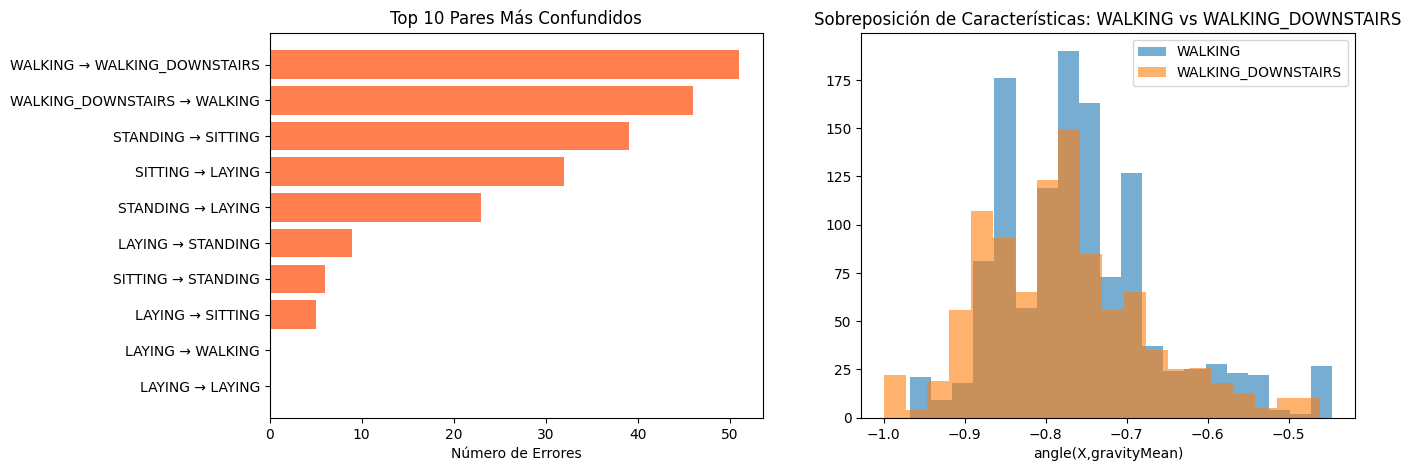

In [52]:
# Visualización 
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Top 10 pares confundidos
top_10 = df_confusion.head(10)
axes[0].barh(top_10['Par'], top_10['Errores'], color='coral')
axes[0].invert_yaxis()
axes[0].set_xlabel("Número de Errores")
axes[0].set_title("Top 10 Pares Más Confundidos")

# Gráfico 2: Distribución para el feature más importante
f0 = key_features[0]
for act in [act_real, act_pred]:
    axes[1].hist(subset[subset['Activity'] == act][f0], bins=20, alpha=0.6, label=act)

axes[1].set_xlabel(f0)
axes[1].set_title(f"Sobreposición de Características: {act_real} vs {act_pred}")
axes[1].legend()

plt.show()



In [49]:
# Ejemplos en X_test 
indices = y_test[y_test['activity_name'].isin([act_real, act_pred])].index
if 'X_test_final' in globals():
    X_subset = X_test_final.loc[indices].copy()
    X_subset['Activity'] = y_test.loc[indices, 'activity_name'].values
    display(X_subset.head())

feature_name,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
79,0.203962,-0.032345,-0.096881,-0.465504,-0.180785,-0.455108,-0.497882,-0.242498,-0.458406,-0.179696,...,-0.209853,-0.586288,0.480130,0.619329,0.892920,-0.311693,-0.675693,0.321986,0.008134,WALKING
80,0.249343,-0.003411,-0.056042,-0.399476,-0.137845,-0.461271,-0.437246,-0.198605,-0.453340,-0.179696,...,-0.495646,-0.808660,0.258529,0.038298,0.904697,-0.421875,-0.670009,0.325729,0.004459,WALKING
81,0.325051,-0.029804,-0.077847,-0.465120,0.013453,-0.367646,-0.500004,-0.032380,-0.341866,-0.339242,...,-0.600738,-0.864935,-0.536458,-0.492501,-0.622143,-0.409633,-0.671101,0.324747,0.001002,WALKING
82,0.308808,-0.022128,-0.132104,-0.514826,0.032009,-0.349003,-0.553718,-0.000161,-0.312035,-0.392279,...,0.046574,-0.234549,-0.444236,0.224709,-0.836464,-0.603949,-0.671904,0.324348,0.003296,WALKING
83,0.265599,-0.015936,-0.120750,-0.500950,-0.163230,-0.389428,-0.537218,-0.159272,-0.367618,-0.302921,...,-0.294736,-0.643889,0.371001,0.731077,-0.855379,-0.111921,-0.676391,0.321438,0.006704,WALKING


In [57]:
# Conclusión 
print("\nCausas probables de confusión:")
print(f"\nEl par {act_real} - {act_pred} es difícil de distinguir porque:")
print("• Sus patrones de movimiento son similares")
print("• Las características tienen diferencias pequeñas")
print("• Comparten dominios de frecuencia similares")


Causas probables de confusión:

El par WALKING - WALKING_DOWNSTAIRS es difícil de distinguir porque:
• Sus patrones de movimiento son similares
• Las características tienen diferencias pequeñas
• Comparten dominios de frecuencia similares


### Limitaciones técnicas

Las limitaciones principales son la dependencia de características manuales (temporal/frecuencia), ya que los modelos deep podrían aprender representaciones más ricas y el posible impacto por desequilibrio de clases; conviene explorar re-muestreo o ponderación.